In [109]:
from graphviz import Source

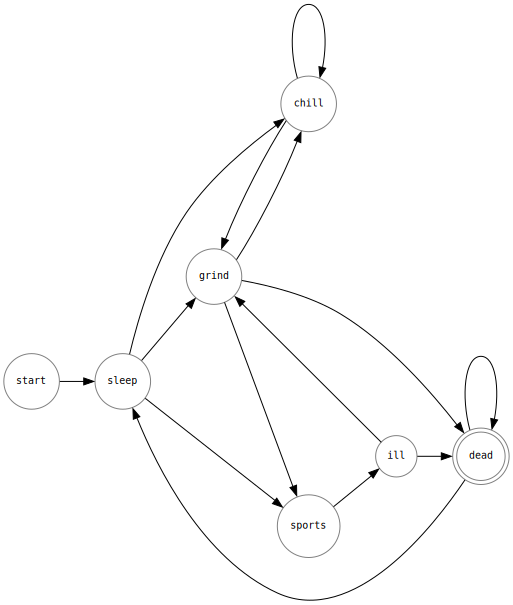

In [110]:
with open('day.dot', 'r') as dot_file: graph = Source(dot_file.read())

graph

In [143]:
import random
class DayModelFSM(object):
    '''
    Class for modeling of one day of UCU student using FSM
    '''
    def __init__(self) -> None:
        self.grind = self._grind()
        self.sleep = self._sleep()
        self.dead = self._dead()
        self.chill = self._chill()
        self.sports = self._sports()
        self.ill = self._ill()

        self.stop = False
        self.current_state = self.sleep

        next(self.grind)
        next(self.sleep)
        next(self.dead)
        next(self.chill)
        next(self.sports)
        next(self.ill)

    def day(self):
        for state in range(24):
            self.current_state.send(state)

    def does_match(self):
        if self.stop:
            return False
        return self.current_state == self.grind

    def _sleep(self):
        while True:
            hour = yield
            print(f'Hour: {hour}, State: Sleep')
            if hour in range(7):
                print('What a nice night, I am full of energy')
                if random.random() < 0.8:
                    print('Gonna do some sports!')
                    self.current_state = self.sports
                else:
                    print('Dude, I have of ton deadlines from DM!')
                    self.current_state = self.grind
            else:
                print('Gonna chill right now!')
                self.current_state = self.chill

    def _grind(self):
        while True:
            hour = yield
            print(f'Hour: {hour}, State: Grind')
            if hour in range(7, 18):
                if random.random() < 0.99:
                    print('Duuude, you overworked...')
                    self.current_state = self.dead
                else:
                    print('I have done a pretty good work today. It is time for chilll...')
                    self.current_state = self.chill
            else:
                print('I had better do some sports after studying!')
                self.current_state = self.sports

    def _sports(self):
        while True:
            hour = yield
            print(f'Hour: {hour}, State: Sports')
            if hour in range(8, 20):
                if random.random() < 0.65:
                    print('I should do a little more sports!')
                    self.current_state = self.sports
                else:
                    print('Yooo, now you have a cold!')
                    self.current_state = self.ill
            else:
                print('Enough sports for today!')
                self.current_state = random.choice([self.chill, self.grind])

    def _ill(self):
        while True:
            hour = yield
            print(f'Hour: {hour}, State: Ill')
            if random.random() < 0.99:
                self.current_state = self.dead
            else:
                print('I am healthy now!')
                self.current_state = self.grind

    def _dead(self):
        while True:
            hour = yield
            print(f'Hour {hour}, State: Dead')
            if random.random() > 0.1:
                print('Now you good as new!')
                self.current_state = self.sleep
            else:
                break

    def _chill(self):
        while True:
            hour = yield
            print(f'Hour: {hour}, State Chill')
            if random.random() < 0.5:
                print('I should go studying after chill!')
                self.current_state = self.grind
            else:
                self.current_state = self.chill


In [144]:
fsm = DayModelFSM()
fsm.day()

Hour: 0, State: Sleep
What a nice night, I am full of energy
Gonna do some sports!
Hour: 1, State: Sports
Enough sports for today!
Hour: 2, State: Grind
I had better do some sports after studying!
Hour: 3, State: Sports
Enough sports for today!
Hour: 4, State: Grind
I had better do some sports after studying!
Hour: 5, State: Sports
Enough sports for today!
Hour: 6, State: Grind
I had better do some sports after studying!
Hour: 7, State: Sports
Enough sports for today!
Hour: 8, State Chill
I should go studying after chill!
Hour: 9, State: Grind
Duuude, you overworked...
Hour 10, State: Dead
Now you good as new!
Hour: 11, State: Sleep
Gonna chill right now!
Hour: 12, State Chill
Hour: 13, State Chill
I should go studying after chill!
Hour: 14, State: Grind
Duuude, you overworked...
Hour 15, State: Dead
Now you good as new!
Hour: 16, State: Sleep
Gonna chill right now!
Hour: 17, State Chill
I should go studying after chill!
Hour: 18, State: Grind
I had better do some sports after studying